# Установка необходимых библиотек

In [1]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fastparquet

  Created wheel for thrift: filename=thrift-0.15.0-py3-none-any.whl size=155297 sha256=63359404736685165544228fcdca1d914cacc9617d21cd1884a31fbce38505f4
  Stored in directory: c:\users\kseniya\appdata\local\pip\cache\wheels\ba\1f\8e\e6fd36837eecf3d1f2b23f1729477e8e06558d8d60b7093f51
Successfully built thrift
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
Note: you may need to restart the kernel to use updated packages.


# Данные архива экстренных сообщений Росгидрометра
https://data.apicrafter.ru/packages/meteorf-extramessage

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Загрузка данных и обработка данных

In [215]:
df = pd.read_parquet('meteorf-extramessage_warnings.parquet')
df

,text,datetime_text,datetime
0,Днем 29 октября и ночью 30 октября на юге Тайм...,28 Октября 2021 [08:06],2021-10-28T08:06:00
1,Утром и днем 27 октября на юге Туруханского и ...,26 Октября 2021 [11:20],2021-10-26T11:20:00
2,Днем 27 октября в Томской области сохранится у...,26 Октября 2021 [10:20],2021-10-26T10:20:00
3,27 октября в центральных районах Красноярского...,26 Октября 2021 [10:15],2021-10-26T10:15:00
4,В ближайшие 2 часа с сохранением 26 и ночью 27...,25 Октября 2021 [13:00],2021-10-25T13:00:00
...,...,...,...
7667,Ночью 14 ноября в южных районах Красноярского ...,13 Ноября 2013 [20:32],2013-11-13T20:32:00
7668,Во второй половине дня 13 ноября в Алтайском к...,13 Ноября 2013 [11:32],2013-11-13T11:32:00
7669,В ближайшие 2 часа13 ноября с сохранением 14 н...,13 Ноября 2013 [10:11],2013-11-13T10:11:00
7670,В Период 12-13 декабря в Дагестане очень сильн...,11 Мая 2013 [12:53],2013-05-11T12:53:00


Удаление последней строки с datetime '0840-01-09T09:01:00', из-за которой будет ошибка.

In [216]:
df = df.iloc[:-1].copy()
df

,text,datetime_text,datetime
0,Днем 29 октября и ночью 30 октября на юге Тайм...,28 Октября 2021 [08:06],2021-10-28T08:06:00
1,Утром и днем 27 октября на юге Туруханского и ...,26 Октября 2021 [11:20],2021-10-26T11:20:00
2,Днем 27 октября в Томской области сохранится у...,26 Октября 2021 [10:20],2021-10-26T10:20:00
3,27 октября в центральных районах Красноярского...,26 Октября 2021 [10:15],2021-10-26T10:15:00
4,В ближайшие 2 часа с сохранением 26 и ночью 27...,25 Октября 2021 [13:00],2021-10-25T13:00:00
...,...,...,...
7666,Ночью 16 ноября в Мурманской области снег (в ц...,15 Ноября 2013 [11:50],2013-11-15T11:50:00
7667,Ночью 14 ноября в южных районах Красноярского ...,13 Ноября 2013 [20:32],2013-11-13T20:32:00
7668,Во второй половине дня 13 ноября в Алтайском к...,13 Ноября 2013 [11:32],2013-11-13T11:32:00
7669,В ближайшие 2 часа13 ноября с сохранением 14 н...,13 Ноября 2013 [10:11],2013-11-13T10:11:00


### Проверка на наличие дубликатов

In [217]:
def show_info(data):
    info_dict = {'column':[], 'dtype':[], 'not na values':[], 'na values':[], 'duplicates':[]}
    for col in data.columns:
        info_dict['column'].append(col)
        info_dict['dtype'].append(data[col].dtype)
        info_dict['not na values'].append(data[col].notna().sum())
        info_dict['na values'].append(data[col].isna().sum())
        info_dict['duplicates'].append(data[col].duplicated(keep=False).sum())
    return pd.DataFrame(info_dict).set_index('column')

show_info(df)

,dtype,not na values,na values,duplicates
column,,,,
text,object,7671,0,1300
datetime_text,object,7671,0,1700
datetime,object,7671,0,1700


Удаление дубликатов.

In [218]:
df = df.drop_duplicates(keep='first')
df.shape

(6956, 3)

In [219]:
df

,text,datetime_text,datetime
0,Днем 29 октября и ночью 30 октября на юге Тайм...,28 Октября 2021 [08:06],2021-10-28T08:06:00
1,Утром и днем 27 октября на юге Туруханского и ...,26 Октября 2021 [11:20],2021-10-26T11:20:00
2,Днем 27 октября в Томской области сохранится у...,26 Октября 2021 [10:20],2021-10-26T10:20:00
3,27 октября в центральных районах Красноярского...,26 Октября 2021 [10:15],2021-10-26T10:15:00
4,В ближайшие 2 часа с сохранением 26 и ночью 27...,25 Октября 2021 [13:00],2021-10-25T13:00:00
...,...,...,...
7666,Ночью 16 ноября в Мурманской области снег (в ц...,15 Ноября 2013 [11:50],2013-11-15T11:50:00
7667,Ночью 14 ноября в южных районах Красноярского ...,13 Ноября 2013 [20:32],2013-11-13T20:32:00
7668,Во второй половине дня 13 ноября в Алтайском к...,13 Ноября 2013 [11:32],2013-11-13T11:32:00
7669,В ближайшие 2 часа13 ноября с сохранением 14 н...,13 Ноября 2013 [10:11],2013-11-13T10:11:00


### Приведение datetime к индексу в формате даты

In [220]:
df.set_index('datetime', inplace = True)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%dT%H:%M:%S')
df

,text,datetime_text
datetime,,
2021-10-28 08:06:00,Днем 29 октября и ночью 30 октября на юге Тайм...,28 Октября 2021 [08:06]
2021-10-26 11:20:00,Утром и днем 27 октября на юге Туруханского и ...,26 Октября 2021 [11:20]
2021-10-26 10:20:00,Днем 27 октября в Томской области сохранится у...,26 Октября 2021 [10:20]
2021-10-26 10:15:00,27 октября в центральных районах Красноярского...,26 Октября 2021 [10:15]
2021-10-25 13:00:00,В ближайшие 2 часа с сохранением 26 и ночью 27...,25 Октября 2021 [13:00]
...,...,...
2013-11-15 11:50:00,Ночью 16 ноября в Мурманской области снег (в ц...,15 Ноября 2013 [11:50]
2013-11-13 20:32:00,Ночью 14 ноября в южных районах Красноярского ...,13 Ноября 2013 [20:32]
2013-11-13 11:32:00,Во второй половине дня 13 ноября в Алтайском к...,13 Ноября 2013 [11:32]


### Категоризация сообщений по регионам РФ

In [221]:
#создаем список регионов и pattern, который дополняем по мере определения и заполнения нового столбца "region" в df.
#Понадобиться несколько итераций и ручная проверка сообщений, в которых значения в столбце "found_regions" будут пустыми.

#Так в списке, помимо сокращенных названий регионов РФ, появились "г. Азов", "Таймыр", "Ключевская сопка", "Татрстан" намеренно написанный с ошибкой.

regions_list = ['Адыге', 'Башкортостан', 'Бурят','Алтай','Алтая','Алтае', 'Дагестан', 'Ингушет', 
                'Кабардино', 'Балкарск', 'Калмык', 'Карачаев', 'Черкесск',
                'Карел', 'Коми', 'Марий', 'Мордов', 'Якут', 'Осети', 'Алани', 'Татарстан', 'Татрстан',
                'Тыв', 'Удмуртск', 'Удмурт','Хакас', 'Чечен', 'Чечн',
                'Чуваш', 'Алтайск','Барнаул','Краснодар','Сочи','Анапа','Черн','Магри','Туапс',
                'Новороссийск','Красноярск','Таймыр',
                'Приморск', 'Владивосток', 'Ставропольск', 'Хабаровск', 'Амурск', 
                'Архангельск', 'Астраханск', 'Белгородск', 'Брянск',
                'Владимирск','Владимировск','Волгоградск', 'Вологодск', 'Вологд','Воронежск',
                'Ивановск', 'Иркутск', 'Калининградск', 'Калужск',
                'Камчатск','Ключевская сопка', 'Кемеровск','Кузбасс', 'Кировск', 'Костромск',
                'Курганск','Курск','Ленинградск','Липецк',
                'Магадан','Московск','Мурманск','Нижегородск',
                'Новгородск','Новосибирск','Омск','Оренбургск',
                'Орловск','Пензенск','Пермск','Псковск','Ростовск','г. Азов',
                'Рязан','Самарск','Саратов','Сахалин', 'Курил', 'Невель','Терпения','Охин',
                'Свердлов','Смоленск','Тамбовск','Тверск','Томск',
                'Тульск','Тюменск','Ульяновск','Челябинск',
                'Забайкальск','Чита','Чите','Ярославск','Ярославл','Москв','Петербург',
                'Еврейск','Ненецк','Нарьян-Мар','Ханты','Мансийск','Югр', 'Чукотк',
                'Чукотск','Ямало-Ненецк','Крым','Керч','Севастопол']

regions_list = [elem.lower() for elem in regions_list]
pattern = '|'.join(regions_list)
pattern

'адыге|башкортостан|бурят|алтай|алтая|алтае|дагестан|ингушет|кабардино|балкарск|калмык|карачаев|черкесск|карел|коми|марий|мордов|якут|осети|алани|татарстан|татрстан|тыв|удмуртск|удмурт|хакас|чечен|чечн|чуваш|алтайск|барнаул|краснодар|сочи|анапа|черн|магри|туапс|новороссийск|красноярск|таймыр|приморск|владивосток|ставропольск|хабаровск|амурск|архангельск|астраханск|белгородск|брянск|владимирск|владимировск|волгоградск|вологодск|вологд|воронежск|ивановск|иркутск|калининградск|калужск|камчатск|ключевская сопка|кемеровск|кузбасс|кировск|костромск|курганск|курск|ленинградск|липецк|магадан|московск|мурманск|нижегородск|новгородск|новосибирск|омск|оренбургск|орловск|пензенск|пермск|псковск|ростовск|г. азов|рязан|самарск|саратов|сахалин|курил|невель|терпения|охин|свердлов|смоленск|тамбовск|тверск|томск|тульск|тюменск|ульяновск|челябинск|забайкальск|чита|чите|ярославск|ярославл|москв|петербург|еврейск|ненецк|нарьян-мар|ханты|мансийск|югр|чукотк|чукотск|ямало-ненецк|крым|керч|севастопол'

In [222]:
#функция поиска названия региона из pattern в тексте сообщений (text), 
#которая добавляет значения в новую колонку "found_regions"

def pattern_searcher(search_str, pattern):
    list_of_found = re.findall(pattern, search_str.lower())
    return ' '.join(list_of_found)

df['found_regions'] = df['text'].apply(lambda x: pattern_searcher(x, pattern))
df

C:\Users\Kseniya\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,datetime_text,found_regions
datetime,,,
2021-10-28 08:06:00,Днем 29 октября и ночью 30 октября на юге Тайм...,28 Октября 2021 [08:06],таймыр красноярск
2021-10-26 11:20:00,Утром и днем 27 октября на юге Туруханского и ...,26 Октября 2021 [11:20],красноярск
2021-10-26 10:20:00,Днем 27 октября в Томской области сохранится у...,26 Октября 2021 [10:20],томск
2021-10-26 10:15:00,27 октября в центральных районах Красноярского...,26 Октября 2021 [10:15],красноярск хакас хакас
2021-10-25 13:00:00,В ближайшие 2 часа с сохранением 26 и ночью 27...,25 Октября 2021 [13:00],томск
...,...,...,...
2013-11-15 11:50:00,Ночью 16 ноября в Мурманской области снег (в ц...,15 Ноября 2013 [11:50],мурманск
2013-11-13 20:32:00,Ночью 14 ноября в южных районах Красноярского ...,13 Ноября 2013 [20:32],красноярск хакас
2013-11-13 11:32:00,Во второй половине дня 13 ноября в Алтайском к...,13 Ноября 2013 [11:32],алтай алтай кемеровск


In [223]:
df[df.index=='2021-10-26 10:15:00'].values

array([['27 октября в центральных районах Красноярского края и в Хакасии ожидается очень сильный западный ветер, местами порывы до 25 м/с, в горах республики Хакасия (м. Ненастная) до 30 м/с.',
        '26 Октября 2021 [10:15]', 'красноярск хакас хакас']],
      dtype=object)

In [224]:
# создаем новые вспомогаетльные колонки для анализа данных

df['month'] = df.index.strftime('%b') #скоращенное название месяца
df['year'] = df.index.year #год
df['day_of_week'] = df.index.strftime('%a')#день недели
df['num_month'] = df.index.month #номер месяца
df['num_dow'] = df.index.day_of_week #номер дня недели
df

C:\Users\Kseniya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kseniya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kseniya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,text,datetime_text,found_regions,month,year,day_of_week,num_month,num_dow
datetime,,,,,,,,
2021-10-28 08:06:00,Днем 29 октября и ночью 30 октября на юге Тайм...,28 Октября 2021 [08:06],таймыр красноярск,Oct,2021,Thu,10,3
2021-10-26 11:20:00,Утром и днем 27 октября на юге Туруханского и ...,26 Октября 2021 [11:20],красноярск,Oct,2021,Tue,10,1
2021-10-26 10:20:00,Днем 27 октября в Томской области сохранится у...,26 Октября 2021 [10:20],томск,Oct,2021,Tue,10,1
2021-10-26 10:15:00,27 октября в центральных районах Красноярского...,26 Октября 2021 [10:15],красноярск хакас хакас,Oct,2021,Tue,10,1
2021-10-25 13:00:00,В ближайшие 2 часа с сохранением 26 и ночью 27...,25 Октября 2021 [13:00],томск,Oct,2021,Mon,10,0
...,...,...,...,...,...,...,...,...
2013-11-15 11:50:00,Ночью 16 ноября в Мурманской области снег (в ц...,15 Ноября 2013 [11:50],мурманск,Nov,2013,Fri,11,4
2013-11-13 20:32:00,Ночью 14 ноября в южных районах Красноярского ...,13 Ноября 2013 [20:32],красноярск хакас,Nov,2013,Wed,11,2
2013-11-13 11:32:00,Во второй половине дня 13 ноября в Алтайском к...,13 Ноября 2013 [11:32],алтай алтай кемеровск,Nov,2013,Wed,11,2


In [225]:
#создаем колонки с регионами, где для каждой строки в соответствующей колонке региона отметим True or False, было ли найдено упоминанием региона в сообщении

for region in regions_list:
    df[region] = df.text.str.lower().str.contains(region, na=False)

C:\Users\Kseniya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kseniya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [226]:
#создаем словарь полных корректных названий для тех регионов, для которых в текстах сообщений 
#упоминаются разные географические объекты данного региона. Словарь поможет переименовать столбцы

region_dict = {
'Марий-Эл': ['Марий'],
'Саха (Якутия)': ['Якут'],
'Северная Осетия - Алания': ['Осети', 'Алани'],
'Ханты-Мансийский АО (Югра)': ['Ханты','Мансийск','Югр'],
'Кабардино-Балкария': ['Кабардино', 'Балкарск'],
'Кемеровская область': ['Кемеровск','Кузбасс'],
'Карачаево-Черкессия': ['Карачаев', 'Черкесск'],
'Чукотка': ['Чукотск', 'Чукотк'],
'Чечня': ['Чечен', 'Чечн'],
'Чувашия': ['Чуваш'],
'Краснодарский край': ['Сочи','Краснодар', 'Анапа', 'Магри', 'Черн','Туапс','Новороссийск'],
'Удмуртия': ['Удмуртск', 'Удмурт',],
'Ненецкий АО': ['Ненецк','Нарьян-Мар'],
'Ярославская обл': ['Ярославск','Ярославл'],
'Сахалинская обл': ['Сахалин', 'Курил','Невель','Терпения','Охин'],
'Татарстан':['Татарстан', 'Татрстан'],
'Камчатский край':['Камчатск','Ключевская сопка'],
'Владимирская обл':['Владимирск','Владимировск'],
'Крым':['Крым','Керч'],
'Алтайский край':['Алтайск','Барнаул'],
'Красноярский край': ['Красноярск','Таймыр'],
'Алтай': ['Алтай','Алтая','Алтае'],
'Приморский край':['Приморск','Владивосток'],
'Вологодская обл':['Вологодск', 'Вологд'],
'Забайкальский край':['Забайкальск','Чита','Чите'],
'Ростовская обл': ['Ростовск','г. Азов']
}

for region in region_dict.keys():
    cols = region_dict[region]
    cols = [elem.lower() for elem in cols]
    df[region] = df[cols].sum(axis=1).astype(bool)
    df.drop(columns=cols, inplace=True)

C:\Users\Kseniya\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Kseniya\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [227]:
#создаем словарь полных корректных названий для остальных регионов

rename_dict = {
'адыге': 'Адыгея',
'башкортостан': 'Башкортостан',
'бурят': 'Бурятия',
'дагестан': 'Дагестан',
'ингушет': 'Ингушетия',
'калмык': 'Калмыкия',
'карел': 'Карелия',
'коми': 'Коми',
'мордов': 'Мордовия',
    'удмурстк': 'Удмуртская обл',
    'хакас': 'Хакасия',
    'тыв': 'Тыва',
    'приморск': 'Приморский край',
    'ставропольск': 'Ставропольский край',
    'хабаровск': 'Хабаровский край',
    'амурск': 'Амурский край',
    'архангельск': 'Архангельская обл',
    'астраханск': 'Астраханская обл',
    'белгородск': 'Белгородская обл',
    'брянск': 'Брянская обл',
    'волгоградск': 'Волгоградская обл',
    'воронежск': 'Воронежская обл',
    'ивановск': 'Ивановская обл',
    'иркутск': 'Иркутская обл',
    'калининградск': 'Калининградская обл',
    'калужск': 'Калужская обл',
    'кировск': 'Кировская обл',
    'костромск': 'Костромская обл',
    'курганск': 'Курганская обл',
    'курск': 'Курская обл',
    'ленинградск': 'Ленинградская обл',
    'липецк': 'Липецкая обл',
    'магадан': 'Магаданская обл',
    'москв': 'Москва',
    'московск': 'Московская обл',
    'мурманск': 'Мурманская обл',
    'нижегородск': 'Нижегородская обл',
    'новгородск': 'Новгородская обл',
    'новосибирск': 'Новосибирская обл',
    'омск': 'Омская обл',
    'оренбургск': 'Оренбургская обл',
    'орловск': 'Орловская обл',
    'пензенск': 'Пензенская обл',
    'пермск': 'Пермская обл',
    'псковск': 'Псковская обл',
    'рязан': 'Рязанская обл',
    'самарск': 'Самарская обл',
    'саратов': 'Саратовская обл',
    'свердлов': 'Свердловская обл',
    'смоленск': 'Смоленская обл',
    'тамбовск': 'Тамбовская обл',
    'тверск': 'Тверская обл',
    'томск': 'Томская обл',
    'тульск': 'Тульская обл',
    'тюменск': 'Тюменская обл',
    'ульяновск': 'Ульяновская обл',
    'челябинск': 'Челябинская обл',       
    'петербург': 'Санкт-Петербург',          
    'еврейск': 'Еврейская АО',               
    'ямало-Ненецк': 'Ямало-Ненецкий АО',
    'севастопол': 'Севастополь'
}

#переименовавыем столбцы
df.rename(columns=rename_dict, inplace=True)

C:\Users\Kseniya\anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Анализ и визуализация данных

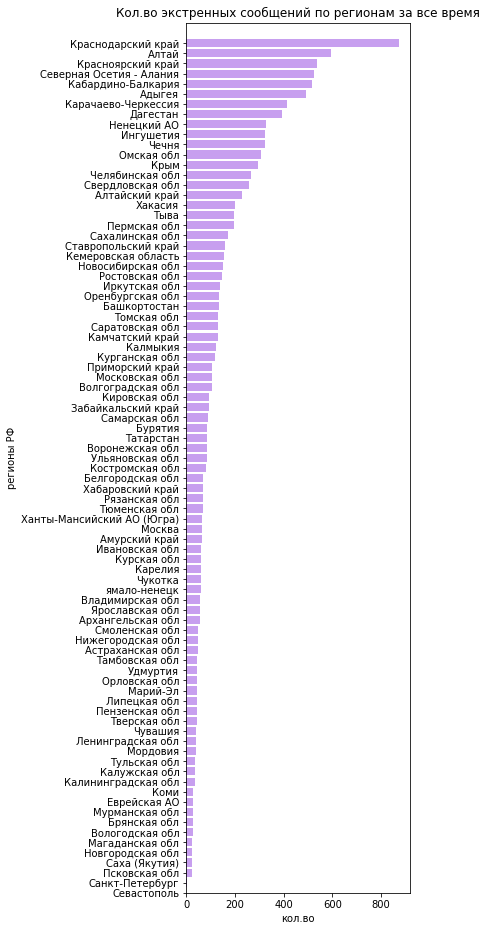

In [228]:
df_regions = df.drop(columns=['text','datetime_text','found_regions', 'num_month', 'month','year','day_of_week','num_dow']).sum()
df_regions.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(4,16))
plt.barh(df_regions.index, df_regions, color='#C79FEF')
#plt.xticks(rotation=90)

plt.title('Кол.во экстренных сообщений по регионам за все время')
plt.ylabel('регионы РФ')
plt.ylim(0,86)
plt.xlabel('кол.во')

plt.show()

Здесь не учтено 115 сообщений из 6956, так как в них содержится информация либо о погоде в каком-либо федеральном округе или о таких географических объектах (море, океан, залив и т.д.), которые могу принадлежать сразу нескольким регионам. 

In [230]:
df[['text','found_regions','year','month','num_month','day_of_week']]

,text,found_regions,year,month,num_month,day_of_week
datetime,,,,,,
2021-10-28 08:06:00,Днем 29 октября и ночью 30 октября на юге Тайм...,таймыр красноярск,2021,Oct,10,Thu
2021-10-26 11:20:00,Утром и днем 27 октября на юге Туруханского и ...,красноярск,2021,Oct,10,Tue
2021-10-26 10:20:00,Днем 27 октября в Томской области сохранится у...,томск,2021,Oct,10,Tue
2021-10-26 10:15:00,27 октября в центральных районах Красноярского...,красноярск хакас хакас,2021,Oct,10,Tue
2021-10-25 13:00:00,В ближайшие 2 часа с сохранением 26 и ночью 27...,томск,2021,Oct,10,Mon
...,...,...,...,...,...,...
2013-11-15 11:50:00,Ночью 16 ноября в Мурманской области снег (в ц...,мурманск,2013,Nov,11,Fri
2013-11-13 20:32:00,Ночью 14 ноября в южных районах Красноярского ...,красноярск хакас,2013,Nov,11,Wed
2013-11-13 11:32:00,Во второй половине дня 13 ноября в Алтайском к...,алтай алтай кемеровск,2013,Nov,11,Wed


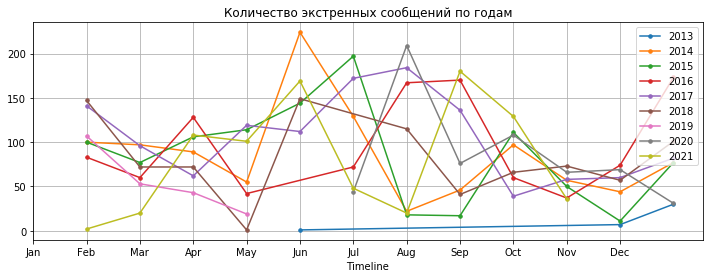

In [231]:
df_monthly = df[['year', 'num_month', 'text']].groupby(by=['year','num_month']).count().reset_index()

plt.figure(figsize = (12,4))

for y in df_monthly.year.unique():
    plt.plot(df_monthly[df_monthly.year==y].num_month,
         df_monthly[df_monthly.year==y].text, label = str(y), marker='.', markersize=7)

plt.title('Количество экстренных сообщений по годам')
plt.legend()
plt.xlabel('Timeline')
plt.grid()
plt.ylim()
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ha='center')
plt.show()

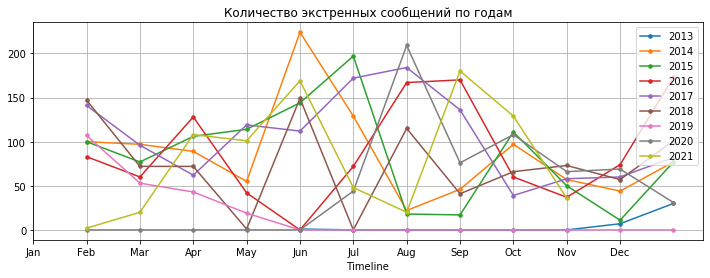

In [232]:
df_monthly = df[['text']].groupby(pd.Grouper(freq='1m')).count()
plt.figure(figsize = (12,4))

for y in df_monthly.index.year.unique():
    plt.plot(df_monthly[df_monthly.index.year==y].index.month,
         df_monthly[df_monthly.index.year==y].text, label = str(y), marker='.', markersize=7)

plt.title('Количество экстренных сообщений по годам')
plt.legend()
plt.xlabel('Timeline')
plt.grid()
plt.ylim()
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ha='center')
plt.show()

In [235]:
df_year = df.groupby(by=['year']).count().sort_values(by='year', ascending=True)
df_year

,text,datetime_text,found_regions,month,day_of_week,num_month,num_dow,Адыгея,Башкортостан,Бурятия,...,Камчатский край,Владимирская обл,Крым,Алтайский край,Красноярский край,Алтай,Приморский край,Вологодская обл,Забайкальский край,Ростовская обл
year,,,,,,,,,,,,,,,,,,,,,
2013,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
2014,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,...,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
2015,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,...,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022
2016,1066,1066,1066,1066,1066,1066,1066,1066,1066,1066,...,1066,1066,1066,1066,1066,1066,1066,1066,1066,1066
2017,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261,...,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261
2018,894,894,894,894,894,894,894,894,894,894,...,894,894,894,894,894,894,894,894,894,894
2019,222,222,222,222,222,222,222,222,222,222,...,222,222,222,222,222,222,222,222,222,222
2020,603,603,603,603,603,603,603,603,603,603,...,603,603,603,603,603,603,603,603,603,603
2021,813,813,813,813,813,813,813,813,813,813,...,813,813,813,813,813,813,813,813,813,813


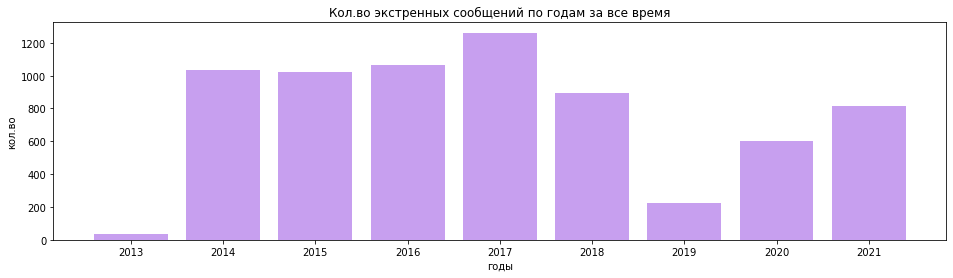

In [236]:
plt.figure(figsize=(16,4))

#plt.bar(df_year.index.astype(str), df_year.text, color='#C79FEF')
plt.bar(df_year.index, df_year.text, color='#C79FEF')
plt.title('Кол.во экстренных сообщений по годам за все время')
plt.ylabel('кол.во')
plt.xlabel('годы')
plt.xticks([y for y in df_year.index])
#plt.xticks([2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.show()

In [233]:
df_month = df.groupby(by=['num_month']).count().sort_values(by='num_month', ascending=True)
df_month

,text,datetime_text,found_regions,month,year,day_of_week,num_dow,Адыгея,Башкортостан,Бурятия,...,Камчатский край,Владимирская обл,Крым,Алтайский край,Красноярский край,Алтай,Приморский край,Вологодская обл,Забайкальский край,Ростовская обл
num_month,,,,,,,,,,,,,,,,,,,,,
1,680,680,680,680,680,680,680,680,680,680,...,680,680,680,680,680,680,680,680,680,680
2,475,475,475,475,475,475,475,475,475,475,...,475,475,475,475,475,475,475,475,475,475
3,608,608,608,608,608,608,608,608,608,608,...,608,608,608,608,608,608,608,608,608,608
4,451,451,451,451,451,451,451,451,451,451,...,451,451,451,451,451,451,451,451,451,451
5,799,799,799,799,799,799,799,799,799,799,...,799,799,799,799,799,799,799,799,799,799
6,662,662,662,662,662,662,662,662,662,662,...,662,662,662,662,662,662,662,662,662,662
7,735,735,735,735,735,735,735,735,735,735,...,735,735,735,735,735,735,735,735,735,735
8,666,666,666,666,666,666,666,666,666,666,...,666,666,666,666,666,666,666,666,666,666
9,610,610,610,610,610,610,610,610,610,610,...,610,610,610,610,610,610,610,610,610,610


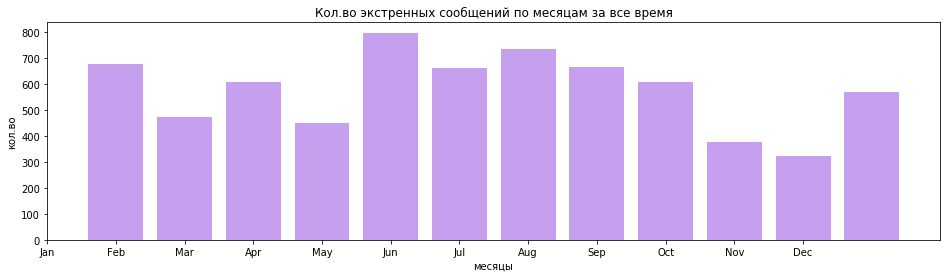

In [234]:
plt.figure(figsize=(16,4))
plt.bar(df_month.index, df_month.text, color='#C79FEF')
plt.title('Кол.во экстренных сообщений по месяцам за все время')
plt.ylabel('кол.во')
plt.xlabel('месяцы')
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ha='center')
plt.show()

In [237]:
df_days = df.groupby(by=['day_of_week']).count().sort_values(by='day_of_week', ascending=True)
df_days.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_days

,text,datetime_text,found_regions,month,year,num_month,num_dow,Адыгея,Башкортостан,Бурятия,...,Камчатский край,Владимирская обл,Крым,Алтайский край,Красноярский край,Алтай,Приморский край,Вологодская обл,Забайкальский край,Ростовская обл
Mon,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,...,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
Tue,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,...,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124
Wed,786,786,786,786,786,786,786,786,786,786,...,786,786,786,786,786,786,786,786,786,786
Thu,891,891,891,891,891,891,891,891,891,891,...,891,891,891,891,891,891,891,891,891,891
Fri,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,...,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
Sat,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,...,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021
Sun,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018


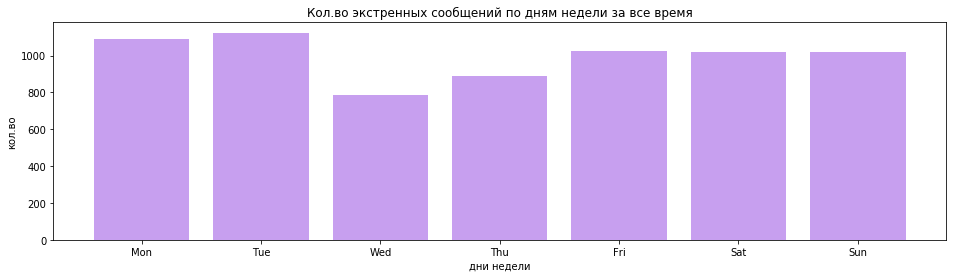

In [238]:
plt.figure(figsize=(16,4))

plt.bar(df_days.index, df_days.text, color='#C79FEF')
plt.title('Кол.во экстренных сообщений по дням недели за все время')
plt.ylabel('кол.во')
plt.xlabel('дни недели')
plt.show()

## Текстовый анализ

In [239]:
df[['text']]

,text
datetime,
2021-10-28 08:06:00,Днем 29 октября и ночью 30 октября на юге Тайм...
2021-10-26 11:20:00,Утром и днем 27 октября на юге Туруханского и ...
2021-10-26 10:20:00,Днем 27 октября в Томской области сохранится у...
2021-10-26 10:15:00,27 октября в центральных районах Красноярского...
2021-10-25 13:00:00,В ближайшие 2 часа с сохранением 26 и ночью 27...
...,...
2013-11-15 11:50:00,Ночью 16 ноября в Мурманской области снег (в ц...
2013-11-13 20:32:00,Ночью 14 ноября в южных районах Красноярского ...
2013-11-13 11:32:00,Во второй половине дня 13 ноября в Алтайском к...


In [240]:
#превращаем данные по сообщениям из датафрейма в список сообщений

text = df.text.str.cat(sep=' ')

In [241]:
text[-1000:]

' по 09.00 МСК 16 ноября в Никеле Мурманской области ожидается усиление юго-восточного ветра в порывах 22-27 м/с, снег, метель. С 23.00 МСК 15 ноября по 13.00 МСК 16 ноября по Мурманской области и в Мурманске ожидается усиление южного, юго-западного ветра в порывах 20-24 м/с, снег (местами сильный), метель. Ночью 16 ноября в Мурманской области снег (в центральных районах сильный), ветер 17-22 м/с (в районе п. Никель до 25 м/с, на побережье до 28 м/с). Ночью 14 ноября в южных районах Красноярского края и в Хакасии ожидается ветер 15-20 м/с, порывы 25 м/с. Во второй половине дня 13 ноября в Алтайском крае, ночью 14 ноября в Алтайском крае и Кемеровской области ожидаются: снег, мокрый снег, гололедные явления, метель, усиление ветра до 17-22 м/с, местами порывы 25-27 м/с. В ближайшие 2 часа13 ноября с сохранением 14 ноября в Томской области ожидается сильное гололедно-изморозевое отложение. В Период 12-13 декабря в Дагестане очень сильный снег, мокрый снег, сильное налипание мокрого снега

In [242]:
text= text.lower()

In [280]:
#удалим знаки препинания, переносы, кавычки и др. символы

import string
print(string.punctuation)

spec_chars = string.punctuation + '\n\xa0«»\t—…°' 
for ch in spec_chars:
    text = text.replace(ch,' ')

#text[:1000]
text[-1000:]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


' по 09 00 мск 16 ноября в никеле мурманской области ожидается усиление юго восточного ветра в порывах 22 27 м с  снег  метель  с 23 00 мск 15 ноября по 13 00 мск 16 ноября по мурманской области и в мурманске ожидается усиление южного  юго западного ветра в порывах 20 24 м с  снег  местами сильный   метель  ночью 16 ноября в мурманской области снег  в центральных районах сильный   ветер 17 22 м с  в районе п  никель до 25 м с  на побережье до 28 м с   ночью 14 ноября в южных районах красноярского края и в хакасии ожидается ветер 15 20 м с  порывы 25 м с  во второй половине дня 13 ноября в алтайском крае  ночью 14 ноября в алтайском крае и кемеровской области ожидаются  снег  мокрый снег  гололедные явления  метель  усиление ветра до 17 22 м с  местами порывы 25 27 м с  в ближайшие 2 часа13 ноября с сохранением 14 ноября в томской области ожидается сильное гололедно изморозевое отложение  в период 12 13 декабря в дагестане очень сильный снег  мокрый снег  сильное налипание мокрого снега

In [281]:
#создадим список из токенов слов

import nltk
nltk.download('punkt')
from nltk import word_tokenize
text_tokens = word_tokenize(text)

len(text_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kseniya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


184136

In [282]:
text_tokens[-1000:]

['17',
 'декабря',
 'всв',
 'в',
 'мурманской',
 'области',
 'в',
 'районе',
 'п',
 'никель',
 'ожидается',
 'усиление',
 'ветра',
 'порывами',
 '22',
 '27',
 'м',
 'с',
 'снег',
 'метель',
 'ночью',
 'и',
 'утром',
 '17',
 'декабря',
 'на',
 'западе',
 'баренцева',
 'моря',
 'ожидается',
 'опасное',
 'волнение',
 'моря',
 'до',
 '8',
 '8',
 '5',
 'метров',
 'при',
 'ветре',
 '18',
 '23',
 'м',
 'с',
 '16',
 '18',
 'декабря',
 'на',
 'юге',
 'камчатского',
 'края',
 'лавиноопасно',
 '15',
 'декабря',
 'в',
 'алтайском',
 'крае',
 'ожидается',
 'снег',
 'мокрый',
 'снег',
 'дождь',
 'гололедные',
 'явления',
 'метель',
 'ветер',
 'до',
 '25',
 'м',
 'с',
 'в',
 'связи',
 'с',
 'изменением',
 'траектории',
 'перемещения',
 'циклона',
 'сильный',
 'снег',
 '7',
 '19',
 'мм',
 'местами',
 'более',
 '20',
 'мм',
 'осадков',
 'сильная',
 'метель',
 'с',
 'видимостью',
 'менее',
 '500',
 'м',
 'ветер',
 '15',
 '20',
 'м',
 'с',
 'на',
 'побережьях',
 'до',
 '25',
 'м',
 'с',
 'ожидаются',
 'в

In [283]:
text_word = nltk.Text(text_tokens)
print(type(text))
print(type(text_word))

<class 'str'>
<class 'nltk.text.Text'>


In [284]:
#проверим частотность употребления слов

from nltk.probability import FreqDist
fdist = FreqDist(text_word)
print(fdist)

<FreqDist with 2205 samples and 184136 outcomes>


In [285]:
print(fdist.most_common(10))

[('в', 12206), ('и', 6819), ('с', 6722), ('м', 4760), ('до', 4565), ('ожидается', 3565), ('на', 3371), ('сильный', 2734), ('местами', 2493), ('области', 2310)]


In [286]:
#загрузим и дополним список стоп-слов

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kseniya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [287]:
russian_stopwords = nltk.corpus.stopwords.words("russian")
russian_stopwords.extend(['это', 'тебе', 'и', 'не', 'в', 'на', 'с', 'что', 'а', 'до', 'по', 'так', 
                          'как', 'где', 'но', 'все', 'всё', 'то', 'к', 'же', 'под', 'из', 'вот', 'ага', 
                          'просто','обо', 'эта','–','вроде','тех','очень','лишь', 'м'])

In [288]:
#почистим список слов от стоп-слов

text_stop = [word for word in nltk.word_tokenize(text) if word not in russian_stopwords]

In [289]:
text_word = nltk.Text(text_stop)
fdist = FreqDist(text_word)
print(fdist.most_common(100))

[('ожидается', 3565), ('сильный', 2734), ('местами', 2493), ('области', 2310), ('ночью', 2294), ('20', 2117), ('ветер', 2113), ('дождь', 2102), ('суток', 1865), ('25', 1801), ('горах', 1610), ('конца', 1479), ('сохранением', 1444), ('ожидаются', 1440), ('3', 1400), ('края', 1373), ('температура', 1352), ('2', 1340), ('1', 1220), ('июля', 1182), ('град', 1162), ('районах', 1119), ('мая', 1090), ('15', 1088), ('июня', 1084), ('лавиноопасно', 1081), ('выше', 1060), ('утром', 1022), ('августа', 1017), ('заморозки', 1005), ('гроза', 1004), ('18', 979), ('7', 978), ('ближайшие', 943), ('января', 926), ('днем', 918), ('30', 915), ('снег', 913), ('сильные', 911), ('сентября', 910), ('крае', 878), ('ветра', 874), ('22', 828), ('марта', 827), ('23', 816), ('декабря', 810), ('часов', 798), ('27', 797), ('5', 729), ('6', 711), ('4', 706), ('час', 698), ('12', 697), ('часа', 695), ('17', 695), ('февраля', 690), ('24', 683), ('ливневый', 659), ('19', 659), ('10', 644), ('аномально', 640), ('погода',

In [290]:
import spacy
import ru_core_news_md

nlp = ru_core_news_md.load() # Language Model

In [291]:
len(text)

1119027

In [292]:
#увеличим объем принимаемых данных nlp

nlp.max_length = 1500000

In [293]:
#лемматизация: приведем слова к первончальной форме

words_all = [word.lemma_ for word in nlp(' '.join(nltk.word_tokenize(text)))if word.text not in russian_stopwords]
print(len(words_all))

141279


In [257]:
'''tokens_all = nltk.word_tokenize(text)
tokens_1 = tokens_all[:len(tokens_all)//2]
tokens_2 = tokens_all[len(tokens_all)//2:]'''

'tokens_all = nltk.word_tokenize(text)\ntokens_1 = tokens_all[:len(tokens_all)//2]\ntokens_2 = tokens_all[len(tokens_all)//2:]'

In [258]:
#len(tokens_all)

In [150]:
#len(tokens_1)

101048

In [83]:
#len(tokens_2)

101049

In [151]:
#words_1 = [word.lemma_ for word in nlp(' '.join(tokens_1)) if word.text not in russian_stopwords]

In [152]:
#words_2 = [word.lemma_ for word in nlp(' '.join(tokens_2)) if word.text not in russian_stopwords]

In [153]:
#words_all = words_1 + words_2

In [294]:
words_all = [word for word in words_all if word.isdigit()==False]
nltk_words_all = nltk.Text(words_all)
fdist_all = nltk.probability.FreqDist(nltk_words_all)
print(len(fdist_all))
print(fdist_all.most_common(100))

1305
[('сильный', 4616), ('ожидаться', 3567), ('ветер', 3056), ('область', 2797), ('дождь', 2720), ('ночь', 2528), ('место', 2431), ('край', 2338), ('час', 2278), ('температура', 2113), ('район', 2036), ('суток', 1865), ('гора', 1614), ('день', 1513), ('гроза', 1495), ('конец', 1493), ('снег', 1454), ('сохранение', 1447), ('ожидаются', 1438), ('град', 1431), ('близкий', 1401), ('июль', 1182), ('май', 1090), ('июнь', 1084), ('утро', 1034), ('август', 1017), ('заморозка', 1005), ('январь', 926), ('сентябрь', 910), ('республика', 863), ('март', 827), ('усиление', 824), ('декабрь', 810), ('высоко', 803), ('воздух', 797), ('лавиноопасно', 783), ('краснодарский', 738), ('сохраниться', 733), ('северный', 716), ('ливневый', 696), ('мокрый', 691), ('февраль', 690), ('норма', 652), ('погода', 646), ('аномально', 640), ('течение', 638), ('половина', 630), ('среднесуточный', 618), ('октябрь', 605), ('метель', 593), ('климатический', 589), ('апрель', 589), ('река', 587), ('красноярский', 558), ('юж

In [295]:
fdist_all

FreqDist({'сильный': 4616, 'ожидаться': 3567, 'ветер': 3056, 'область': 2797, 'дождь': 2720, 'ночь': 2528, 'место': 2431, 'край': 2338, 'час': 2278, 'температура': 2113, ...})

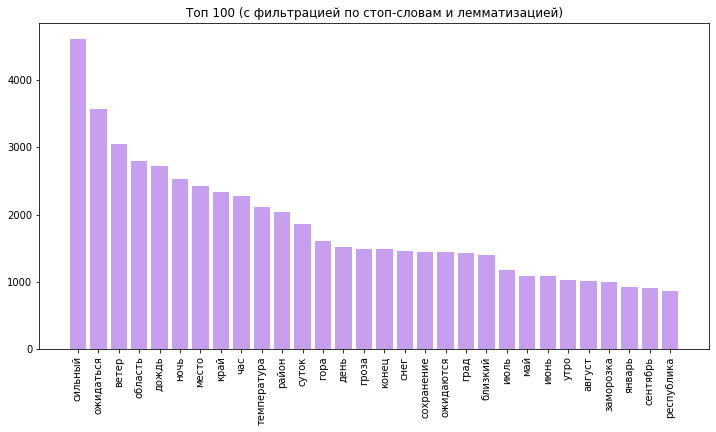

In [296]:
plt.figure(figsize=(12,6))
plt.title('Топ 100 (с фильтрацией по стоп-словам и лемматизацией)')
plt.bar([word[0] for word in fdist_all.most_common(30)],
        [word[1] for word in fdist_all.most_common(30)], color='#C79FEF')
plt.xticks(rotation=90);
plt.show();

In [297]:
from wordcloud import WordCloud

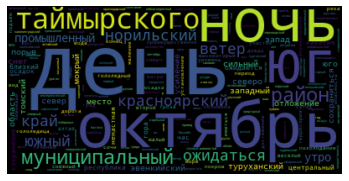

In [298]:
wordcloud = WordCloud().generate(' '.join(fdist_all))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off"); plt.show();

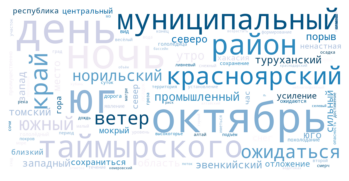

In [299]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white",
                      margin=5,
                      random_state=1,
                      prefer_horizontal=0.75,
                      scale = 4,
                      colormap = 'PuBu'
                      #color_func=lambda *args, **kwargs: (0,0,0))
                      ).generate(' '.join(fdist_all))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off"); plt.show();
#wordcloud.to_file("k-viz-211220-23-16.png");